In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
law_data = pd.read_excel('law dataset.xlsx')
print(law_data.head())
print(law_data.shape)

                                            sentence    category
0                            [sixteen] years of age;  family law
1  (b) “child marriage” means a marriage to which...  family law
2  (c) “contracting party” to a marriage means ei...  family law
3          [or is about to be] thereby solemnized; *  family law
4  (d) “minor” means a person of either sex who i...  family law
(61905, 2)


In [3]:
law_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61905 entries, 0 to 61904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  61905 non-null  object
 1   category  61905 non-null  object
dtypes: object(2)
memory usage: 967.4+ KB


In [4]:
print('There are {} rows and {} columns in law_data'.format(law_data.shape[0],law_data.shape[1]))


There are 61905 rows and 2 columns in law_data


In [5]:
"""

Converting string categories into integer categories for better visualization

"""

likert_scale = {'criminal law':1, 'Fraud':2, 'family law':3, 'Contract Act And Sales Of Goods Act':4, 'sexuall harasment':5,'human rights':6}
law_data['categorical_data'] = law_data.category.apply(lambda x: likert_scale[x])


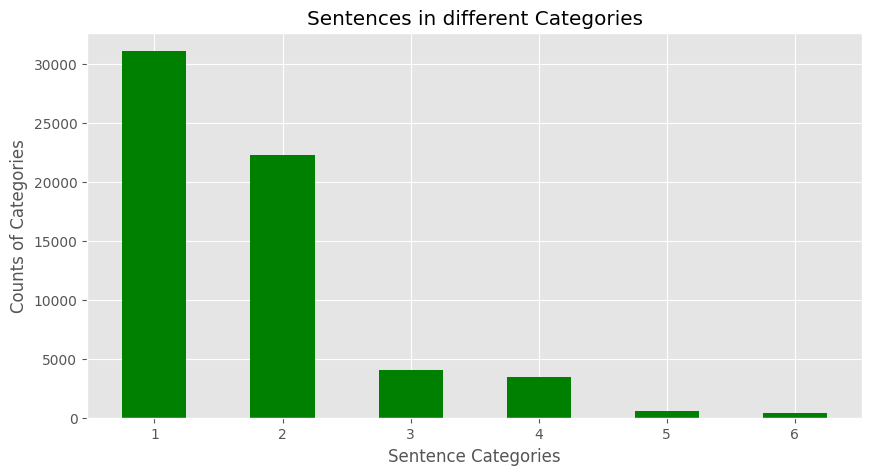

In [6]:
x = law_data.categorical_data.value_counts()
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x.index, x.values, color ='green',
        width = 0.5)
 
plt.xlabel("Sentence Categories")
plt.ylabel("Counts of Categories")
plt.title("Sentences in different Categories")
plt.show()

ohh,as expected ! There is a class distribution.There are more sentences with class 1 ( criminal law ) as compared to other sentences

### Exploratory Data Analysis of Sentences


First,we will do very basic analysis,that is character level,word level and sentence level analysis.



There are 31128 sentences in category 1


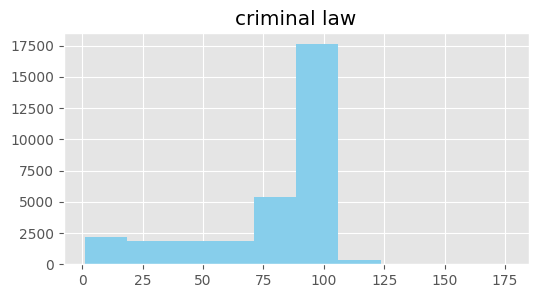

There are 22309 sentences in category 2


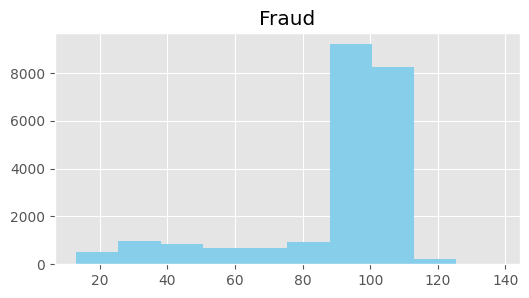

There are 4040 sentences in category 3


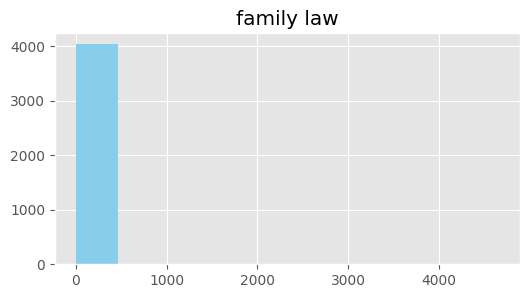

There are 3487 sentences in category 4


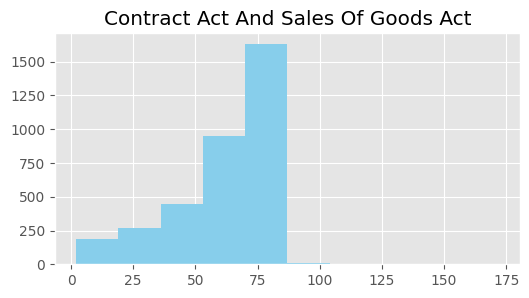

There are 536 sentences in category 5


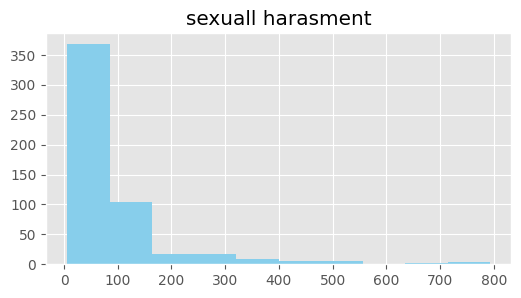

There are 405 sentences in category 6


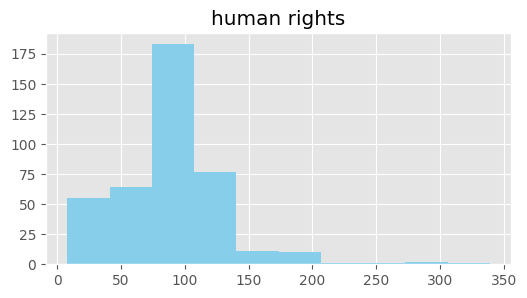

In [7]:
for i in range(1,7):
    print('There are {} sentences in category {}'.format(law_data[law_data['categorical_data']==i].shape[0],i))


    fig,(ax1)=plt.subplots(1,figsize=(6,3))
    sentence_len=law_data[law_data['categorical_data']==i]['sentence'].str.len()
    ax1.hist(sentence_len,color='skyblue')
    ax1.set_title(list(likert_scale.keys())[i-1])
    # fig.suptitle('Characters in Sentences')
    plt.show()


### Characters are not evenly distributed between classes


Checking Words in the sentences if they are distributed correctly

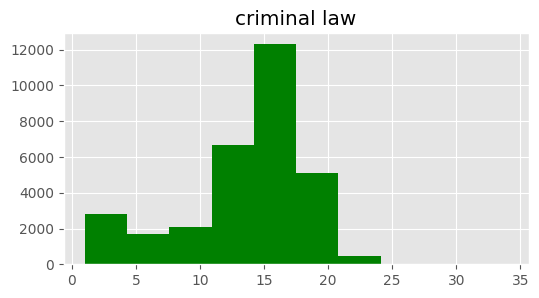

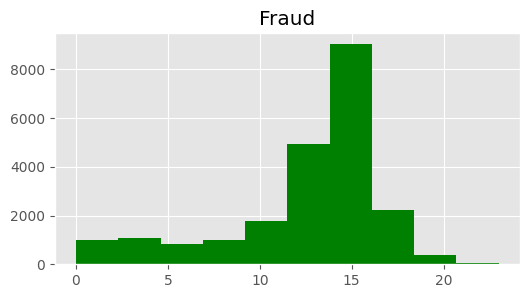

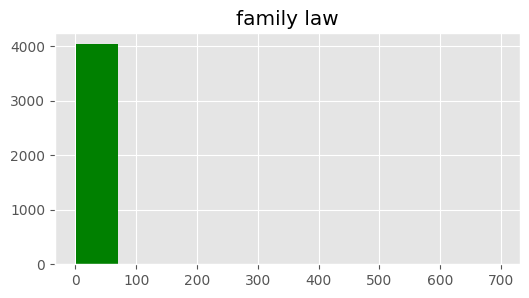

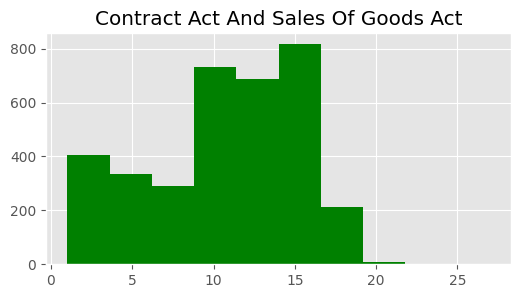

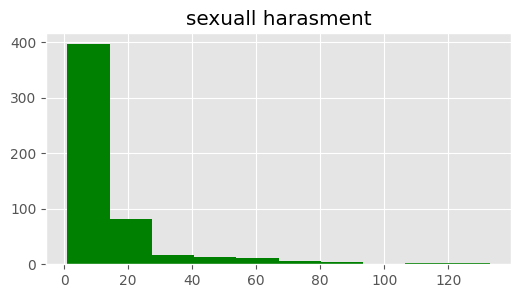

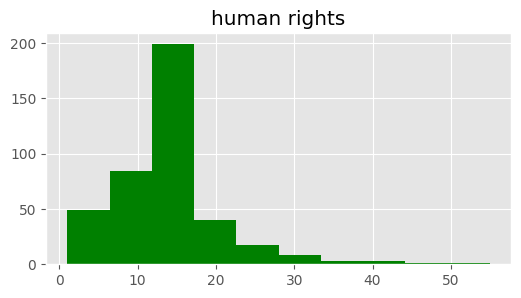

In [8]:
for i in range(1,7):
    # print('There are {} sentences in category {}'.format(law_data[law_data['categorical_data']==i].shape[0],i))


    fig,(ax1)=plt.subplots(1,figsize=(6,3))
    sentence_len=law_data[law_data['categorical_data']==i]['sentence'].str.split().map(lambda x: len(x))
    ax1.hist(sentence_len,color='green')
    ax1.set_title(list(likert_scale.keys())[i-1])
    # fig.suptitle('Characters in Sentences')
    plt.show()


### Average lenghts of sentences

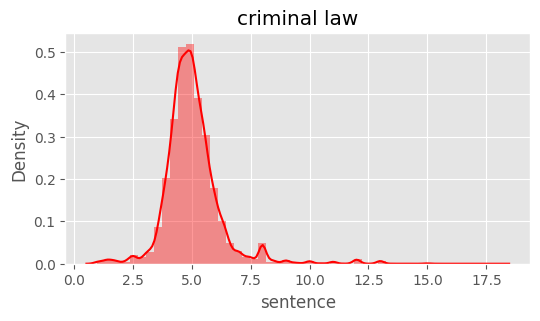

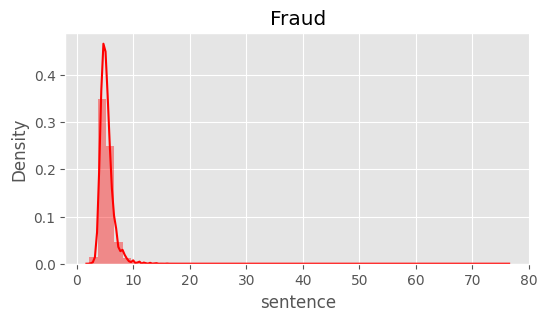

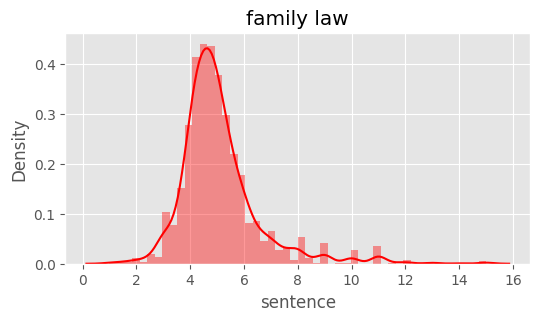

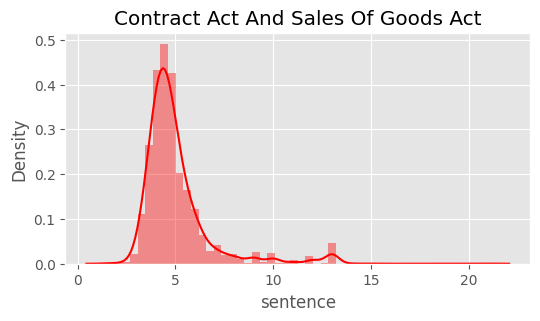

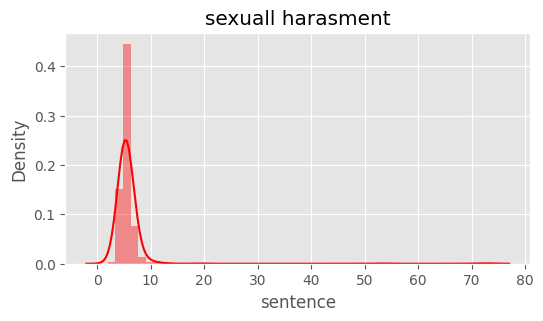

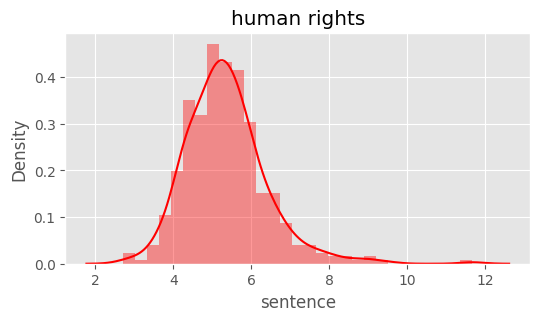

In [9]:
for i in range(1,7):
    fig,(ax1)=plt.subplots(1,figsize=(6,3))
    word=law_data[law_data['categorical_data']==i]['sentence'].str.split().apply(lambda x : [len(i) for i in x])
    sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
    ax1.set_title(list(likert_scale.keys())[i-1])
    # fig.suptitle('Average word length in each sentence')
    plt.show()

In [10]:
def create_corpus(target):
    corpus=[]
    
    for x in law_data[law_data['categorical_data']==target]['sentence'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

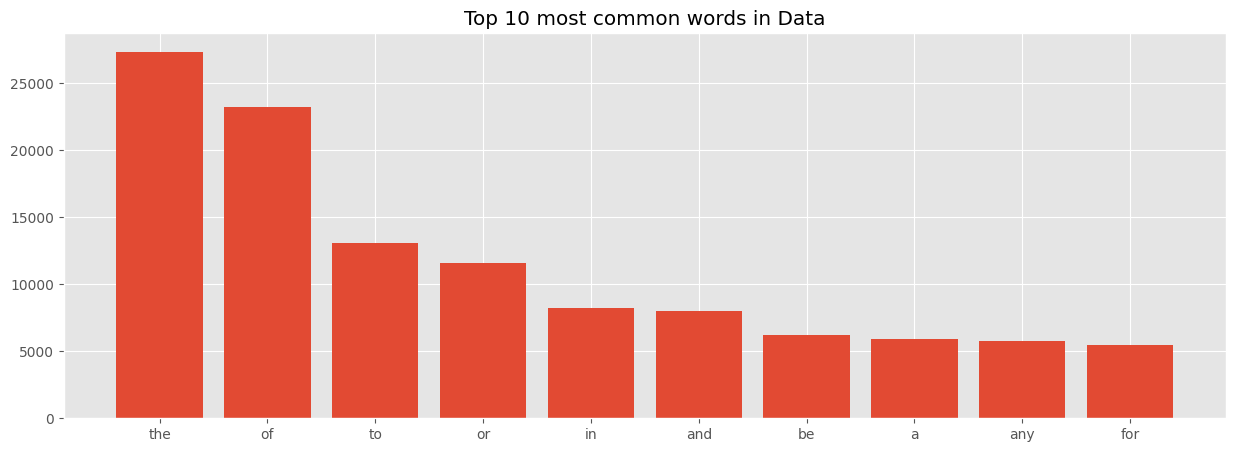

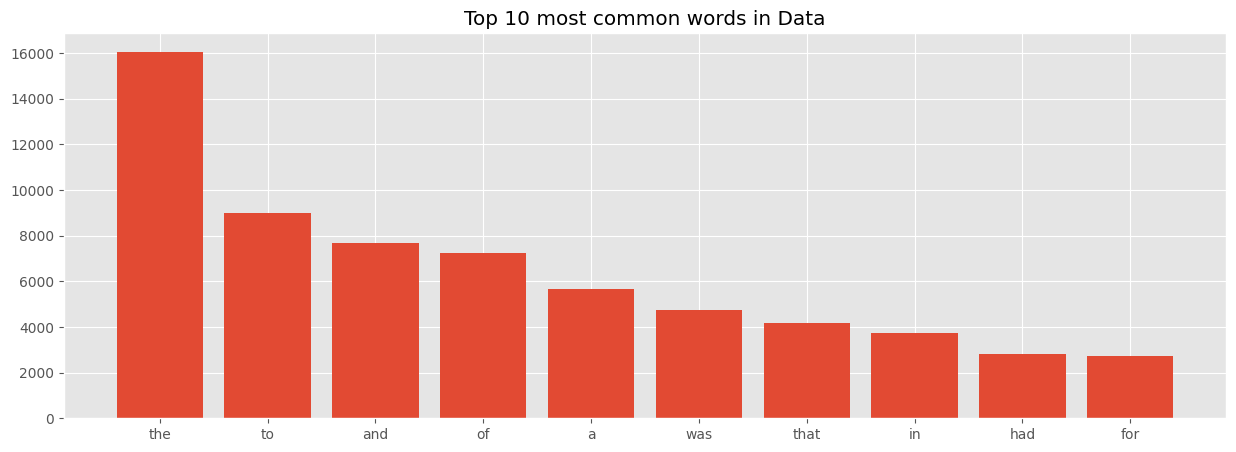

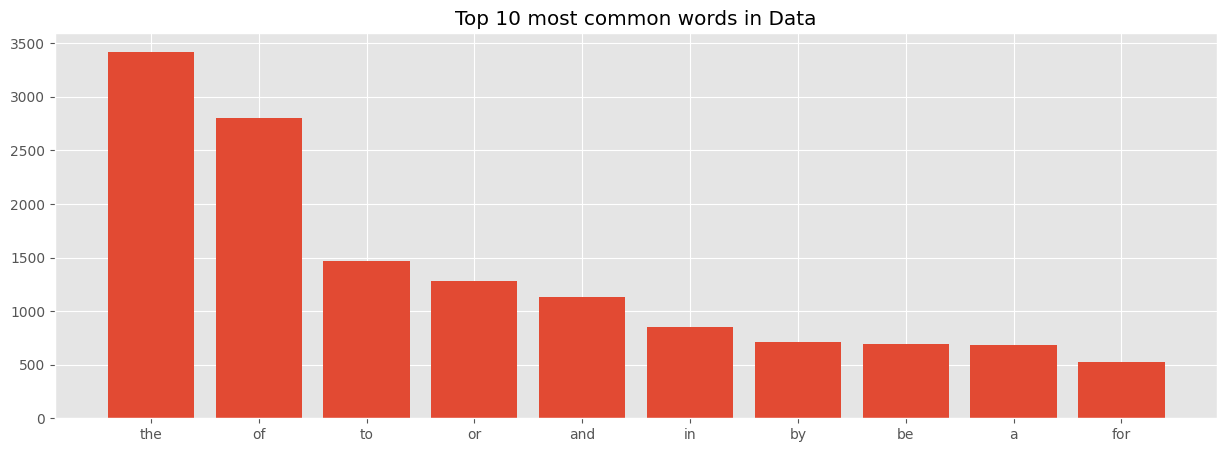

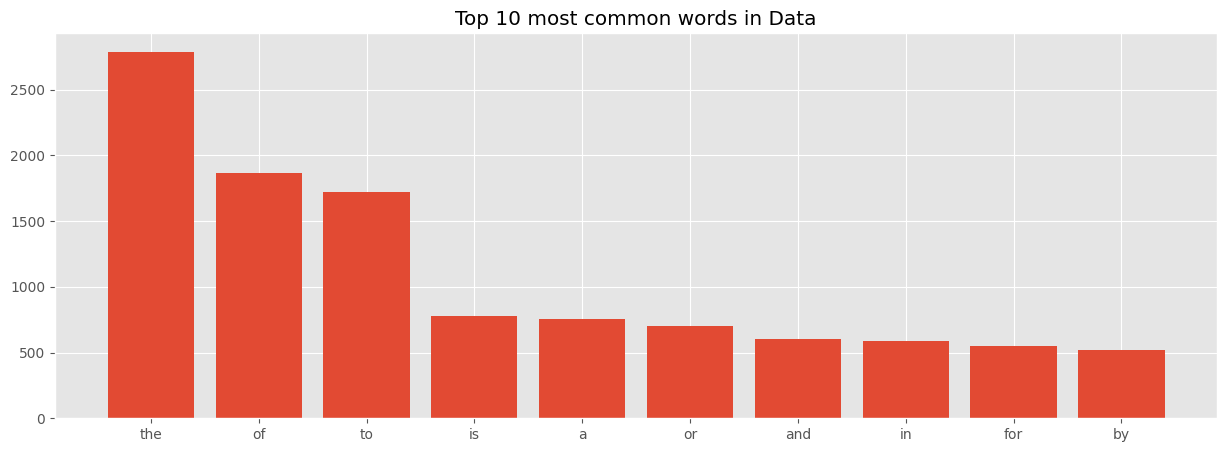

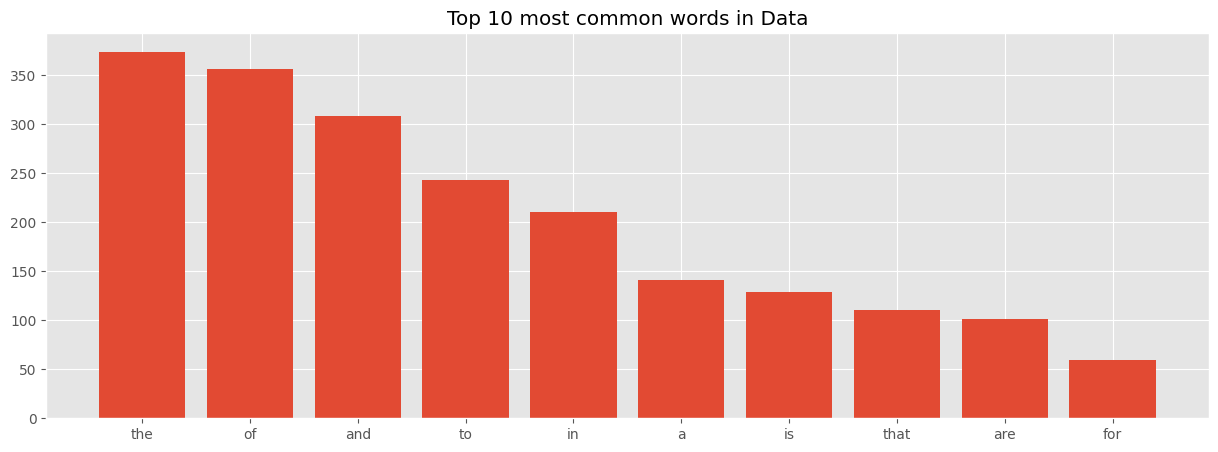

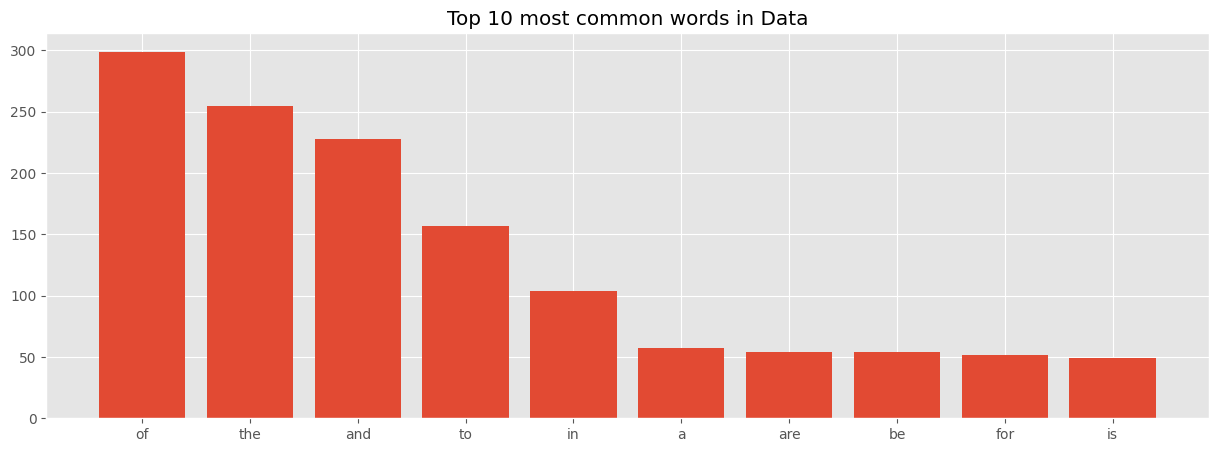

In [11]:
""" 
Common stopwords in Sentences
First we will analyze Sentences with class criminal law.

"""

for i in range(1,7):
    corpus=create_corpus(i)

    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.figure(figsize=(15,5))
    plt.title("Top 10 most common words in Data")
    plt.bar(x,y)

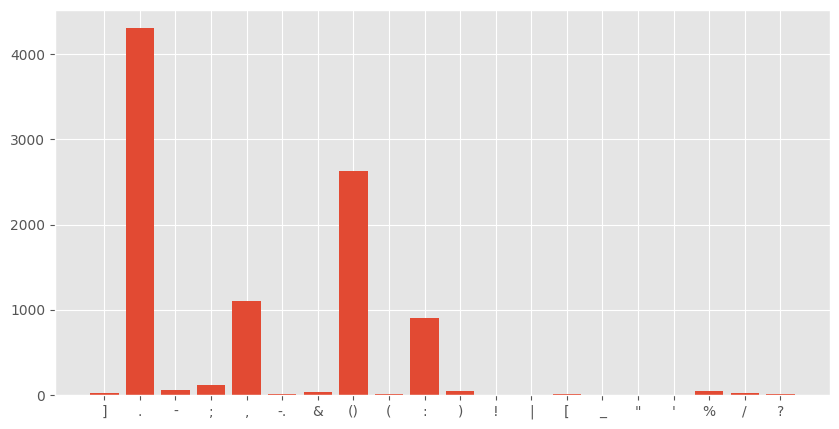

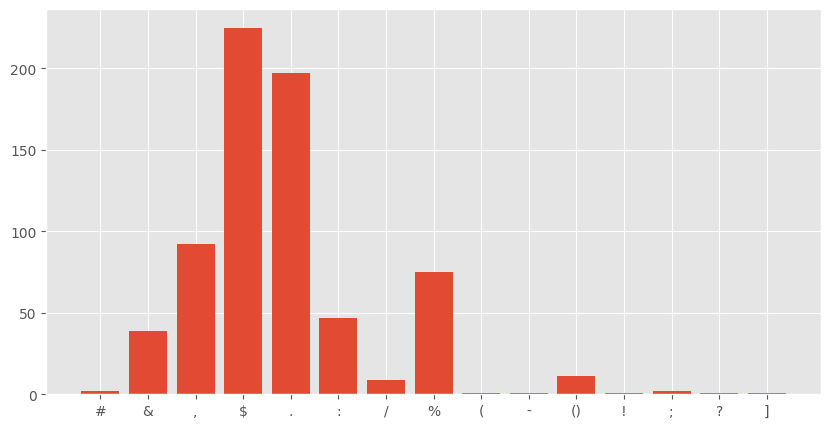

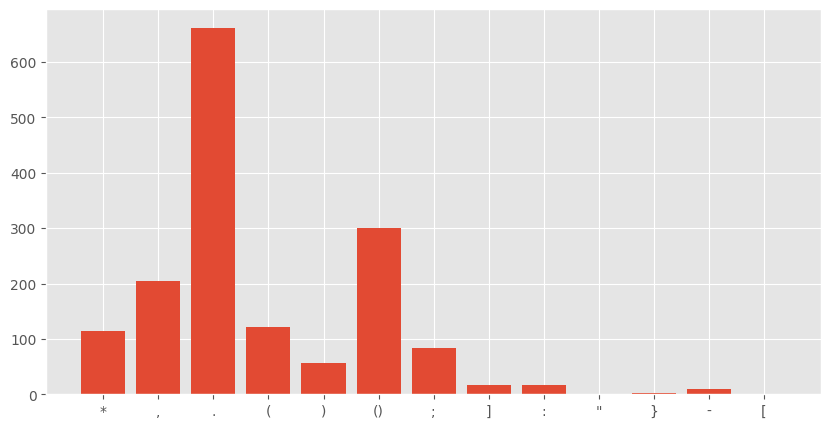

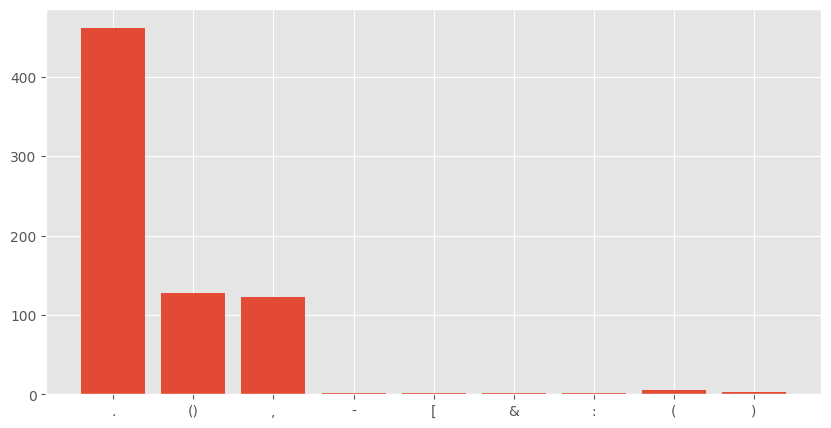

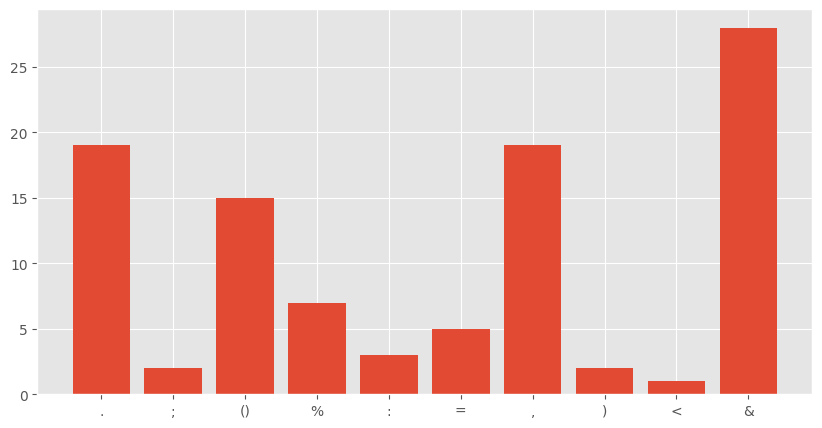

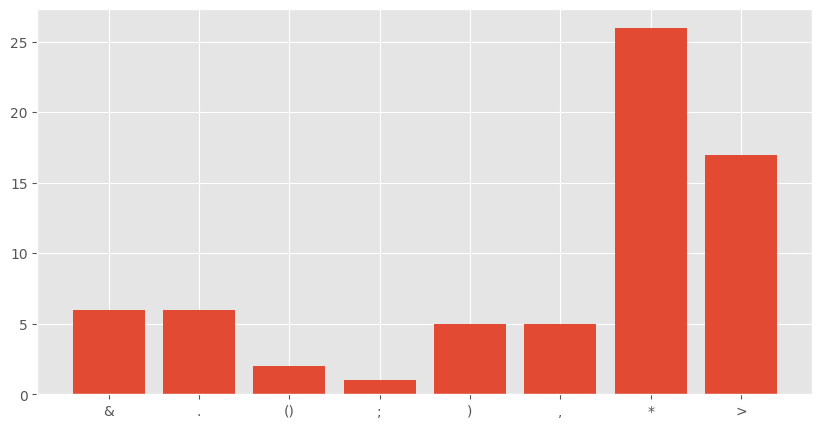

In [12]:
for j in range(1,7):
    plt.figure(figsize=(10,5))
    corpus=create_corpus(j)

    dic=defaultdict(int)
    import string
    special = string.punctuation
    for i in (corpus):
        if i in special:
            dic[i]+=1
            
    x,y=zip(*dic.items())
    plt.bar(x,y)

In [13]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

<AxesSubplot: >

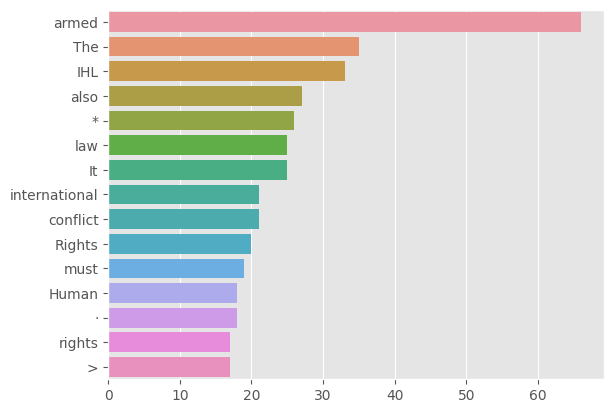

In [14]:
sns.barplot(x=y,y=x)


In [15]:
def get_top_sentence_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot: >

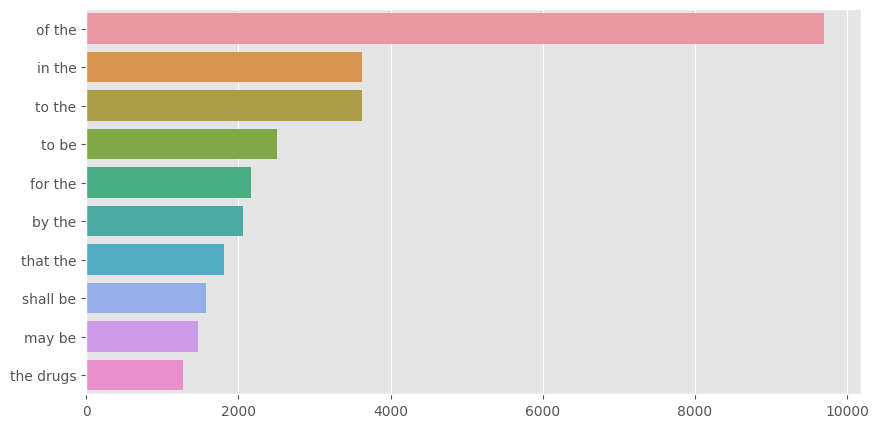

In [16]:
plt.figure(figsize=(10,5))
top_sentence_bigrams=get_top_sentence_bigrams(law_data['sentence'])[:10]
x,y=map(list,zip(*top_sentence_bigrams))
sns.barplot(x=y,y=x)

In [17]:
def clean(sentence): 
            
    # Special characters
    sentence = re.sub(r"\x89Û_", "", sentence)
    sentence = re.sub(r"\x89ÛÒ", "", sentence)
    sentence = re.sub(r"\x89ÛÓ", "", sentence)
    sentence = re.sub(r"\x89ÛÏWhen", "When", sentence)
    sentence = re.sub(r"\x89ÛÏ", "", sentence)
    sentence = re.sub(r"China\x89Ûªs", "China's", sentence)
    sentence = re.sub(r"let\x89Ûªs", "let's", sentence)
    sentence = re.sub(r"\x89Û÷", "", sentence)
    sentence = re.sub(r"\x89Ûª", "", sentence)
    sentence = re.sub(r"\x89Û\x9d", "", sentence)
    sentence = re.sub(r"å_", "", sentence)
    sentence = re.sub(r"\x89Û¢", "", sentence)
    sentence = re.sub(r"\x89Û¢åÊ", "", sentence)
    sentence = re.sub(r"fromåÊwounds", "from wounds", sentence)
    sentence = re.sub(r"åÊ", "", sentence)
    sentence = re.sub(r"åÈ", "", sentence)
    sentence = re.sub(r"JapÌ_n", "Japan", sentence)    
    sentence = re.sub(r"Ì©", "e", sentence)
    sentence = re.sub(r"å¨", "", sentence)
    sentence = re.sub(r"SuruÌ¤", "Suruc", sentence)
    sentence = re.sub(r"åÇ", "", sentence)
    sentence = re.sub(r"å£3million", "3 million", sentence)
    sentence = re.sub(r"åÀ", "", sentence)
    
    # Contractions
    sentence = re.sub(r"he's", "he is", sentence)
    sentence = re.sub(r"there's", "there is", sentence)
    sentence = re.sub(r"We're", "We are", sentence)
    sentence = re.sub(r"That's", "That is", sentence)
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"they're", "they are", sentence)
    sentence = re.sub(r"Can't", "Cannot", sentence)
    sentence = re.sub(r"wasn't", "was not", sentence)
    sentence = re.sub(r"don\x89Ûªt", "do not", sentence)
    sentence = re.sub(r"aren't", "are not", sentence)
    sentence = re.sub(r"isn't", "is not", sentence)
    sentence = re.sub(r"What's", "What is", sentence)
    sentence = re.sub(r"haven't", "have not", sentence)
    sentence = re.sub(r"hasn't", "has not", sentence)
    sentence = re.sub(r"There's", "There is", sentence)
    sentence = re.sub(r"He's", "He is", sentence)
    sentence = re.sub(r"It's", "It is", sentence)
    sentence = re.sub(r"You're", "You are", sentence)
    sentence = re.sub(r"I'M", "I am", sentence)
    sentence = re.sub(r"shouldn't", "should not", sentence)
    sentence = re.sub(r"wouldn't", "would not", sentence)
    sentence = re.sub(r"i'm", "I am", sentence)
    sentence = re.sub(r"I\x89Ûªm", "I am", sentence)
    sentence = re.sub(r"I'm", "I am", sentence)
    sentence = re.sub(r"Isn't", "is not", sentence)
    sentence = re.sub(r"Here's", "Here is", sentence)
    sentence = re.sub(r"you've", "you have", sentence)
    sentence = re.sub(r"you\x89Ûªve", "you have", sentence)
    sentence = re.sub(r"we're", "we are", sentence)
    sentence = re.sub(r"what's", "what is", sentence)
    sentence = re.sub(r"couldn't", "could not", sentence)
    sentence = re.sub(r"we've", "we have", sentence)
    sentence = re.sub(r"it\x89Ûªs", "it is", sentence)
    sentence = re.sub(r"doesn\x89Ûªt", "does not", sentence)
    sentence = re.sub(r"It\x89Ûªs", "It is", sentence)
    sentence = re.sub(r"Here\x89Ûªs", "Here is", sentence)
    sentence = re.sub(r"who's", "who is", sentence)
    sentence = re.sub(r"I\x89Ûªve", "I have", sentence)
    sentence = re.sub(r"y'all", "you all", sentence)
    sentence = re.sub(r"can\x89Ûªt", "cannot", sentence)
    sentence = re.sub(r"would've", "would have", sentence)
    sentence = re.sub(r"it'll", "it will", sentence)
    sentence = re.sub(r"we'll", "we will", sentence)
    sentence = re.sub(r"wouldn\x89Ûªt", "would not", sentence)
    sentence = re.sub(r"We've", "We have", sentence)
    sentence = re.sub(r"he'll", "he will", sentence)
    sentence = re.sub(r"Y'all", "You all", sentence)
    sentence = re.sub(r"Weren't", "Were not", sentence)
    sentence = re.sub(r"Didn't", "Did not", sentence)
    sentence = re.sub(r"they'll", "they will", sentence)
    sentence = re.sub(r"they'd", "they would", sentence)
    sentence = re.sub(r"DON'T", "DO NOT", sentence)
    sentence = re.sub(r"That\x89Ûªs", "That is", sentence)
    sentence = re.sub(r"they've", "they have", sentence)
    sentence = re.sub(r"i'd", "I would", sentence)
    sentence = re.sub(r"should've", "should have", sentence)
    sentence = re.sub(r"You\x89Ûªre", "You are", sentence)
    sentence = re.sub(r"where's", "where is", sentence)
    sentence = re.sub(r"Don\x89Ûªt", "Do not", sentence)
    sentence = re.sub(r"we'd", "we would", sentence)
    sentence = re.sub(r"i'll", "I will", sentence)
    sentence = re.sub(r"weren't", "were not", sentence)
    sentence = re.sub(r"They're", "They are", sentence)
    sentence = re.sub(r"Can\x89Ûªt", "Cannot", sentence)
    sentence = re.sub(r"you\x89Ûªll", "you will", sentence)
    sentence = re.sub(r"I\x89Ûªd", "I would", sentence)
    sentence = re.sub(r"let's", "let us", sentence)
    sentence = re.sub(r"it's", "it is", sentence)
    sentence = re.sub(r"can't", "cannot", sentence)
    sentence = re.sub(r"don't", "do not", sentence)
    sentence = re.sub(r"you're", "you are", sentence)
    sentence = re.sub(r"i've", "I have", sentence)
    sentence = re.sub(r"that's", "that is", sentence)
    sentence = re.sub(r"i'll", "I will", sentence)
    sentence = re.sub(r"doesn't", "does not", sentence)
    sentence = re.sub(r"i'd", "I would", sentence)
    sentence = re.sub(r"didn't", "did not", sentence)
    sentence = re.sub(r"ain't", "am not", sentence)
    sentence = re.sub(r"you'll", "you will", sentence)
    sentence = re.sub(r"I've", "I have", sentence)
    sentence = re.sub(r"Don't", "do not", sentence)
    sentence = re.sub(r"I'll", "I will", sentence)
    sentence = re.sub(r"I'd", "I would", sentence)
    sentence = re.sub(r"Let's", "Let us", sentence)
    sentence = re.sub(r"you'd", "You would", sentence)
    sentence = re.sub(r"It's", "It is", sentence)
    sentence = re.sub(r"Ain't", "am not", sentence)
    sentence = re.sub(r"Haven't", "Have not", sentence)
    sentence = re.sub(r"Could've", "Could have", sentence)
    sentence = re.sub(r"youve", "you have", sentence)  
    sentence = re.sub(r"donå«t", "do not", sentence)   
            
    # Character entity references
    sentence = re.sub(r"&gt;", ">", sentence)
    sentence = re.sub(r"&lt;", "<", sentence)
    sentence = re.sub(r"&amp;", "&", sentence)

    # Removes all punctuation from a string, if present
    sentence = re.sub(r'[^a-zA-Z0-9]', ' ', sentence)

    # Removes extra whitespaces from a string, if present
    sentence = re.sub(r'^\s*|\s\s*', ' ', sentence).strip()
    
    # Typos, slang and informal abbreviations
    sentence = re.sub(r"w/e", "whatever", sentence)
    sentence = re.sub(r"w/", "with", sentence)
    sentence = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", sentence)

    # ... and ..
    sentence = sentence.replace('...', ' ... ')
    if '...' not in sentence:
        sentence = sentence.replace('..', '.')
    return sentence



In [18]:
law_data['cleaned_sentence'] = law_data['sentence'].apply(lambda s : clean(s))


In [19]:
def word_count_func(text):
    '''
    Counts words within a string
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Number of words within a string, integer
    ''' 
    return len(text.split())

In [20]:
law_data = law_data[law_data['cleaned_sentence'].map(word_count_func) > 2].reset_index(drop=True)

In [21]:
law_data

,sentence,category,categorical_data,cleaned_sentence
0,[sixteen] years of age;,family law,3,sixteen years of age
1,(b) “child marriage” means a marriage to which...,family law,3,b child marriage means a marriage to which eit...
2,(c) “contracting party” to a marriage means ei...,family law,3,c contracting party to a marriage means either...
3,[or is about to be] thereby solemnized; *,family law,3,or is about to be thereby solemnized
4,(d) “minor” means a person of either sex who i...,family law,3,d minor means a person of either sex who is un...
...,...,...,...,...
58092,"humanitarian principles. Established in , the ...",human rights,6,humanitarian principles Established in the ICR...
58093,the International Red Cross and Red Crescent M...,human rights,6,the International Red Cross and Red Crescent M...
58094,activities conducted by the Movement in armed ...,human rights,6,activities conducted by the Movement in armed ...
58095,International Committee of the Red Cross,human rights,6,International Committee of the Red Cross


<AxesSubplot: >

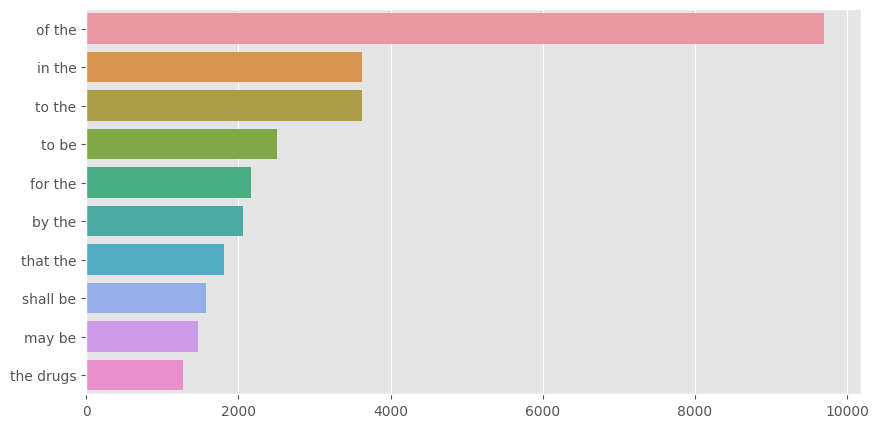

In [22]:
plt.figure(figsize=(10,5))
top_sentence_bigrams=get_top_sentence_bigrams(law_data['cleaned_sentence'])[:10]
x,y=map(list,zip(*top_sentence_bigrams))
sns.barplot(x=y,y=x)

In [23]:
law_data.to_csv('cleaned_dataset.csv')

In [27]:
law_data = law_data[law_data['cleaned_sentence'].map(word_count_func) > 2].reset_index(drop=True)
law_data[law_data['categorical_data']==1]['sentence'].str.len()

3455      43
3456      50
3457      78
3458      49
3459      45
        ... 
32697     84
32698     63
32699    105
32700     96
32701     88
Name: sentence, Length: 29247, dtype: int64

In [28]:
def character_count_func(text):
    '''
    Counts words within a string
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Number of words within a string, integer
    ''' 
    return len(text.str.len())

In [30]:
law_data = law_data[law_data['cleaned_sentence'].map(word_count_func) > 10].reset_index(drop=True)

In [33]:
law_data.to_csv('cleaned_dataset.csv')

<BarContainer object of 6 artists>

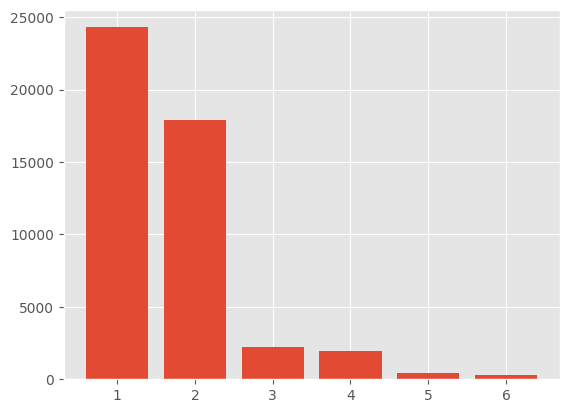

In [40]:
plt.bar(law_data.groupby('categorical_data').count()['cleaned_sentence'].index, law_data.groupby('categorical_data').count()['cleaned_sentence'].values)